## Import libraries

In [20]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport  # One-stop-shop for initial profile of a dataset

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import glob
import os
import sys

import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance

## Define reusable functions

#### Function for reading data

In [3]:
fpath = "..\\data\\all_raw_files"
fname_model_data = "model_data.csv"

In [4]:
# load data
dataset = loadtxt(f'{fpath}\{fname_model_data}', delimiter=",", skiprows=1)



In [10]:
dataset = np.delete(dataset, 0, 1)

In [12]:
np.set_printoptions(threshold=sys.maxsize)

print(dataset)

[[ 2.01000000e+03  1.00000000e+00  2.08680082e+01  1.60000000e+00
   4.11000000e+01  8.94145039e+03  1.31081663e+07  1.37650400e+04
   1.06135300e+04  2.82783920e+04  7.11045400e+06  4.45042500e+04]
 [ 2.01000000e+03  2.00000000e+00  2.02189066e+01  3.20000000e+00
   3.54000000e+01  8.85546768e+03  1.16626509e+07  1.33772700e+04
   1.03806679e+04  3.21539860e+04  7.11940500e+06  4.45042500e+04]
 [ 2.01000000e+03  3.00000000e+00  1.98282863e+01  6.30000000e+00
   3.47000000e+01  8.69872513e+03  1.26392476e+07  1.19914700e+04
   1.01329787e+04  3.81955880e+04  7.12835600e+06  4.45042500e+04]
 [ 2.01000000e+03  4.00000000e+00  1.75938559e+01  6.50000000e+00
   2.99000000e+01  8.45286341e+03  1.19692546e+07  1.14361300e+04
   9.80407233e+03  4.51427230e+04  7.13366800e+06  4.45042500e+04]
 [ 2.01000000e+03  5.00000000e+00  1.53234848e+01  3.10000000e+00
   2.84000000e+01  8.89777051e+03  1.29195628e+07  1.23864900e+04
   1.05580235e+04  5.43703320e+04  7.13898000e+06  4.45042500e+04]
 [ 2.

In [11]:
dataset.shape

(144, 12)

In [13]:
# split data into X and y
X = np.delete(dataset, 7, 1)
y = dataset[:,7]


In [14]:
X.shape

(144, 11)

In [15]:
print(X)

[[ 2.01000000e+03  1.00000000e+00  2.08680082e+01  1.60000000e+00
   4.11000000e+01  8.94145039e+03  1.31081663e+07  1.06135300e+04
   2.82783920e+04  7.11045400e+06  4.45042500e+04]
 [ 2.01000000e+03  2.00000000e+00  2.02189066e+01  3.20000000e+00
   3.54000000e+01  8.85546768e+03  1.16626509e+07  1.03806679e+04
   3.21539860e+04  7.11940500e+06  4.45042500e+04]
 [ 2.01000000e+03  3.00000000e+00  1.98282863e+01  6.30000000e+00
   3.47000000e+01  8.69872513e+03  1.26392476e+07  1.01329787e+04
   3.81955880e+04  7.12835600e+06  4.45042500e+04]
 [ 2.01000000e+03  4.00000000e+00  1.75938559e+01  6.50000000e+00
   2.99000000e+01  8.45286341e+03  1.19692546e+07  9.80407233e+03
   4.51427230e+04  7.13366800e+06  4.45042500e+04]
 [ 2.01000000e+03  5.00000000e+00  1.53234848e+01  3.10000000e+00
   2.84000000e+01  8.89777051e+03  1.29195628e+07  1.05580235e+04
   5.43703320e+04  7.13898000e+06  4.45042500e+04]
 [ 2.01000000e+03  6.00000000e+00  1.33433167e+01 -5.00000000e-01
   2.84000000e+01  

In [16]:
y.shape

(144,)

In [17]:
print(y)

[13765.04 13377.27 11991.47 11436.13 12386.49 13176.33 12616.29 12158.8
 12065.1  12394.02 12606.64 13700.02 14579.86 14417.03 14449.88 13810.3
 13121.52 12354.12 12883.81 12736.43 12367.92 12058.56 12055.05 11960.01
 11887.6  11695.39 11801.08 11738.11 12152.87 12096.07 11897.55 11504.56
 11270.91 11344.03 11913.49 11446.72 13787.85 11186.   10769.45 10456.64
 10956.21 11553.75 11264.18 12972.78 11506.23 11075.95 11841.88 11916.82
 11845.77 10902.47 11095.83 10885.23 10683.85 11265.85 11282.96 11196.49
 10715.74 11066.85 11724.94 11421.16 11574.02 11625.47 11410.1  11463.39
 11755.17 11677.38 12137.29 11533.73 11283.72 11298.69 12601.82 11329.6
 12777.07 13458.63 11660.81 11980.94 11505.27 12599.78 11701.21 11663.09
 12191.08 11287.87 11713.57 12297.62 13947.7  11828.37 11914.9  11168.62
 12790.82 13677.86 11652.8  11345.96 12601.15 13985.87 13348.37 12986.04
 12494.58 12846.15 11615.92 10766.64 10855.27 12076.7  12230.57 12088.8
 11278.72 11322.89 11180.67 11333.28 13700.9  11898.99 

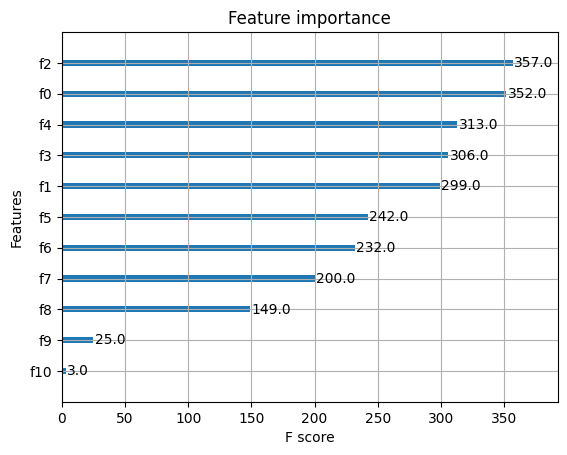

In [22]:
# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()